In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise 1

Implementation of RK1, RK2 and RK4 methods for solving ODes

We solve the following equation:

\begin{align*}
y'(t) = -4y(t) \\ y(0) = 2, ~ t \in [0,2]
\end{align*}

We use $\Delta t = 0.2$

### Analytic Solution

\begin{align*}
\frac{dy}{dx} = -4y \implies y(t) = y(0)e^{-4t}
\end{align*}



### RK1

With RK1 we perform the folowing update step

\begin{align*}
y_{n+1 } = y_n + (t_{n+1} - t_n)f(t_n,y_n)
\end{align*}


In [2]:
def rk1(f,t0,y0,dt,num_steps):
    """
    Runge-Kutta method of order 1 (Euler's method) for solving ODEs.
    
    Parameters:
    f : function
        The function defining the ODE dy/dt = f(t, y).
    t0 : float
        Initial time.
    y0 : float
        Initial value of y at t0.
    dt : float
        Time step size.
    num_steps : int
        Number of steps to take.
    
    Returns:
    t : numpy array
        Array of time values.
    y : numpy array
        Array of solution values at each time step.
    """
    t = np.zeros(num_steps + 1)
    y = np.zeros(num_steps + 1)
    
    t[0] = t0
    y[0] = y0
    
    for i in range(num_steps):
        y[i + 1] = y[i] + dt * f(t[i], y[i])
        t[i + 1] = t[i] + dt
    
    return t, y

### RK2

The order 2 Runge-Kutte performs the following update step

\begin{align*}
y_{n+1} = y_n + hf(t+ \frac{h}{2},y_n + \frac{h}{2}f(t_n,y_n))
\end{align*}

where $h = t_{n+1} - t_n$

In [3]:
def rk2(f,t0,y0,dt,num_steps):
    """
    Runge-Kutta method of order 2 for solving ODEs.
    
    Parameters:
    f : function
        The function defining the ODE dy/dt = f(t, y).
    t0 : float
        Initial time.
    y0 : float
        Initial value of y at t0.
    dt : float
        Time step size.
    num_steps : int
        Number of steps to take.
    """
    t = np.zeros(num_steps + 1)
    y = np.zeros(num_steps + 1)
    
    t[0] = t0
    y[0] = y0
    
    for i in range(num_steps):
        k1 = f(t[i], y[i])
        k2 = f(t[i] + dt, y[i] + dt * k1)
        y[i + 1] = y[i] + (dt / 2) * (k1 + k2)
        t[i + 1] = t[i] + dt
    
    return t, y

### RK4

The order 4 Runge-Kutta performs the following update step

\begin{align*}
y_{n+1} = y_n + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4)
\end{align*}

where

\begin{align*}
k_1 = f(t_n,y_n) \\
k_2 = f(t_n + \frac{h}{2}, y_n + \frac{h}{2}k_1) \\
k_3 = f(t_n + \frac{h}{2}, y_n + \frac{h}{2}k_2) \\
k_4 = f(t_n + h, y_n + hk_3)
\end{align*}

In [4]:
def rk4(f,t0,y0,dt,num_steps):
    """
    Runge-Kutta method of order 4 for solving ODEs.
    
    Parameters:
    f : function
        The function defining the ODE dy/dt = f(t, y).
    t0 : float
        Initial time.
    y0 : float
        Initial value of y at t0.
    dt : float
        Time step size.
    num_steps : int
        Number of steps to take.
    """
    t = np.zeros(num_steps + 1)
    y = np.zeros(num_steps + 1)
    
    t[0] = t0
    y[0] = y0
    
    for i in range(num_steps):
        k1 = f(t[i], y[i])
        k2 = f(t[i] + dt / 2, y[i] + (dt / 2) * k1)
        k3 = f(t[i] + dt / 2, y[i] + (dt / 2) * k2)
        k4 = f(t[i] + dt, y[i] + dt * k3)
        y[i + 1] = y[i] + (dt / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
        t[i + 1] = t[i] + dt
    
    return t, y

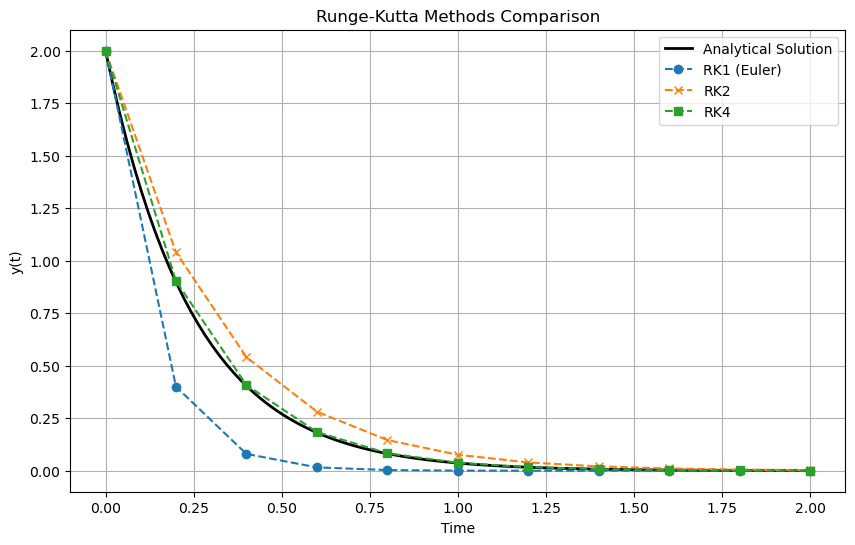

In [5]:
def f(t,y):
    """
    Example Function
    """ 
    return -4*y

def analytical_solution(t):
    """
    Analytical solution for the example function
    """
    return 2*np.exp(-4*t)

t_0, y_0 = 0,2
t_end = 2
dt = 0.2
num_steps = int(t_end/dt)

# Compute RK Solutions

t_rk1, y_rk1 = rk1(f, t_0, y_0, dt, num_steps)
t_rk2, y_rk2 = rk2(f, t_0, y_0, dt, num_steps)
t_rk4, y_rk4 = rk4(f, t_0, y_0, dt, num_steps)

# Plot Analytical Solution
t_analytical = np.linspace(t_0, t_end, 100)
y_analytical = analytical_solution(t_analytical)

# Plot the Results
plt.figure(figsize=(10, 6))
plt.plot(t_analytical, y_analytical, label='Analytical Solution', color='black', linewidth=2)
plt.plot(t_rk1, y_rk1, label='RK1 (Euler)', linestyle='--', marker='o')
plt.plot(t_rk2, y_rk2, label='RK2', linestyle='--', marker='x')
plt.plot(t_rk4, y_rk4, label='RK4', linestyle='--', marker='s')
plt.title('Runge-Kutta Methods Comparison')
plt.xlabel('Time')
plt.ylabel('y(t)')
plt.legend()
plt.grid()
plt.show()





In this plot we can can clearly see that $RK4$ is the most accurate method with the highest order. As also shown in other Proseminar exercises the Euler method is the least accurate and lies below the analytical curve.

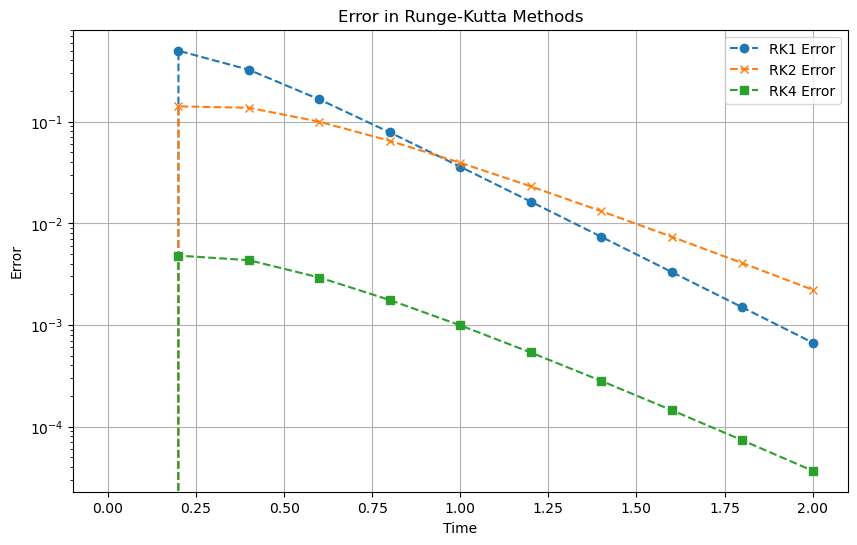

In [6]:
# Plot the errors
plt.figure(figsize=(10, 6))
plt.plot(t_rk1, np.abs(y_rk1 - analytical_solution(t_rk1)), label='RK1 Error', linestyle='--', marker='o')
plt.plot(t_rk2, np.abs(y_rk2 - analytical_solution(t_rk2)), label='RK2 Error', linestyle='--', marker='x')
plt.plot(t_rk4, np.abs(y_rk4 - analytical_solution(t_rk4)), label='RK4 Error', linestyle='--', marker='s')
plt.title('Error in Runge-Kutta Methods')
plt.xlabel('Time')
plt.ylabel('Error')
plt.legend()
plt.yscale('log')
plt.grid()
plt.show()

The error plot also shows that the $RK4$ method is the best

### Convergence Plot for a series of Time intervals

Next we plot the convergence RK Methods with the following formula

\begin{align*}
order = \log(E_1/E_2)/\log(2)
\end{align*}

where $E_1$ and $E_2$ are the errors at $\Delta t$ and $\Delta t/2$ repsectively

In [7]:
def compute_error(method, dt):
    """  
    Computes the error of a given Runge-Kutta method with dt
    """
    num_steops = int(t_end/dt)
    t, y = method(f, t_0, y_0, dt, num_steps)
    y_analytical = analytical_solution(t)
    error = np.max(np.abs(y - y_analytical)) # Max absolute error
    return error

dt_list = [0.2, 0.1, 0.05, 0.025]

errors_rk1 = [compute_error(rk1, dt) for dt in dt_list]
errors_rk2 = [compute_error(rk2, dt) for dt in dt_list]
errors_rk4 = [compute_error(rk4, dt) for dt in dt_list]

# Print the convergence orders

print("-------  Convergence Orders -------")
for i in range(len(dt_list)-1):
    # RK1 (Euler Method)
    order_rk1 = np.log(errors_rk1[i]/errors_rk1[i+1]) / np.log(2)

    # RK2 order
    order_rk2 = np.log(errors_rk2[i]/errors_rk2[i+1]) / np.log(2)

    # RK4 order
    order_rk4 = np.log(errors_rk4[i]/errors_rk4[i+1]) / np.log(2)

    print(f" For dt = {dt_list[i]} to dt = {dt_list[i+1]}:")
    print(f" RK1 Order: {order_rk1:.2f},  Expected: 1")
    print(f" RK2 Order: {order_rk2:.2f},  Expected: 2")
    print(f" RK4 Order: {order_rk4:.2f},  Expected: 4")
    print("-----------------------------------")



-------  Convergence Orders -------
 For dt = 0.2 to dt = 0.1:
 RK1 Order: 1.48,  Expected: 1
 RK2 Order: 2.42,  Expected: 2
 RK4 Order: 4.48,  Expected: 4
-----------------------------------
 For dt = 0.1 to dt = 0.05:
 RK1 Order: 1.15,  Expected: 1
 RK2 Order: 2.21,  Expected: 2
 RK4 Order: 4.22,  Expected: 4
-----------------------------------
 For dt = 0.05 to dt = 0.025:
 RK1 Order: 1.07,  Expected: 1
 RK2 Order: 2.11,  Expected: 2
 RK4 Order: 4.12,  Expected: 4
-----------------------------------


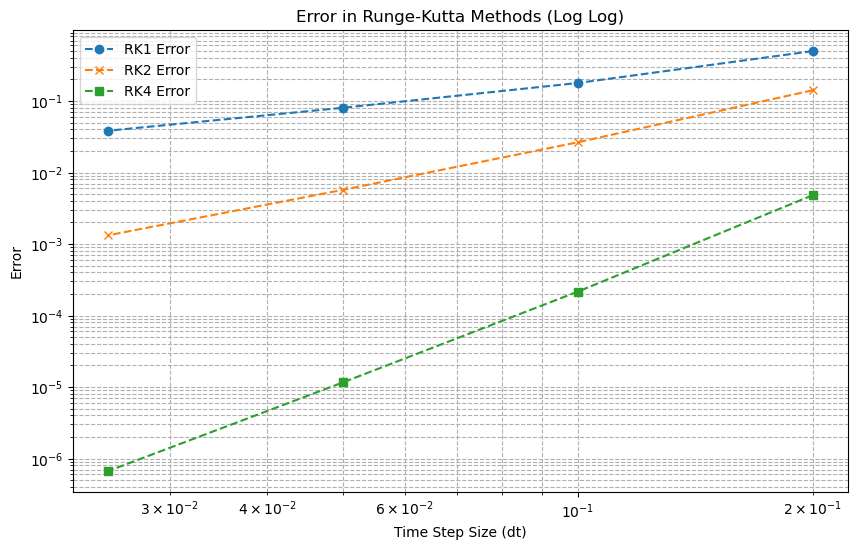

In [8]:
plt.figure(figsize=(10, 6))
plt.loglog(dt_list, errors_rk1, label='RK1 Error', linestyle='--', marker='o')
plt.loglog(dt_list, errors_rk2, label='RK2 Error', linestyle='--', marker='x')
plt.loglog(dt_list, errors_rk4, label='RK4 Error', linestyle='--', marker='s')
plt.title('Error in Runge-Kutta Methods (Log Log)')
plt.xlabel('Time Step Size (dt)')
plt.ylabel('Error')
plt.legend()
plt.grid(which='both', linestyle='--')
plt.show()

# Exercise 4 (Three Body Problem)

We now consider the Three Body Problem given by the Arenstorf Orbit

\begin{align*}
y_1'' = y_1 + 2y_2' - (1- \mu) \frac{y_1 + \mu}{D_1} - \mu \frac{y_1 - 1 + \mu}{D_2} \\
y_2'' = y_2 - 2y_1' - (1- \mu) \frac{y_2}{D_1} - \mu \frac{y_2}{D_2}
\end{align*}

where

\begin{align*}
D_1 = ((y_1 + \mu)^2 + y_2^2)^{3/2} \\
D_2 = ((y_1 - 1 + \mu)^2 + y_2^2)^{3/2}
\end{align*}

Richard F. Arenstorf (November 7, 1929 – September 18, 2014) was an American mathematician. He discovered a stable orbit between the Earth and the Moon, called an Arenstorf Orbit. It was the basis of the orbit used by the Apollo Program for going to the Moon.

We first define a system of first order ODEs

\begin{align*}
z_1 = y_1 \\
z_2 = y_1' \\
z_3 = y_2 \\
z_4 = y_2' \\
\end{align*}

such that we can write our problem

\begin{align*}
z_1' = z_2 \\
z_2' = z_2 + 2z_4 - (1- \mu) \frac{z_1 + \mu}{D_1} - \mu \frac{z_1 -1 + \mu}{D_2} \\
z_3' = z_4 \\
z_4' = z_3 - 2z_2 - (1- \mu) \frac{z_3}{D_1} - \mu \frac{z_3}{D_2}
\end{align*}

And we also substitute the $D_1$ and $D_2$ terms

\begin{align*}
D_1 = ((z_1 + \mu)^2 + z_3^2)^{3/2} \\
D_2 = ((z_1 - 1 + \mu)^2 + z_3^2)^{3/2}
\end{align*}

In [9]:
# Parameters

mu = 0.012277471
t_end = 17.06521656015796255889

N_list = [6000, 12000, 24000, 48000] # Steps

# Starting conditions

z0 = np.array([0.994, 0.0, 0.0, -2.0015851063790855224])

# Define D1 and D2

def comp_D1_D2(z1,z3):
    D1 = ((z1+ mu)**2 + z3**2)**(3/2)
    D2 = ((z1 - 1 + mu)**2 + z3**2)**(3/2)
    return D1,D2

# Right side of ODE

def f(t,z):
    z1, z2, z3, z4 = z
    D1,D2 = comp_D1_D2(z1,z3)

    dz1dt = z2
    dz2dt = z1 + 2*z4 - (1-mu)*(z1+mu)/D1 - mu*(z1-1+mu)/D2
    dz3dt = z4
    dz4dt = z3 - 2*z2 - (1-mu)*z3/D1 - mu*z3/D2
    return np.array([dz1dt, dz2dt, dz3dt, dz4dt])

# Define Now RK4 Method
def rk4(f,t0,z0,dt,num_steps):
    """
    Runge-Kutta method of order 4 for solving ODEs.
    
    Parameters:
    f : function
        The function defining the ODE dz/dt = f(t, z).
    t0 : float
        Initial time.
    z0 : numpy array
        Initial value of z at t0.
    dt : float
        Time step size.
    num_steps : int
        Number of steps to take.
    
    Returns:
    t : numpy array
        Array of time values.
    z : numpy array
        Array of solution values at each time step.
    """
    t = np.zeros(num_steps + 1)
    z = np.zeros((num_steps + 1, len(z0)))
    
    t[0] = t0
    z[0] = z0
    
    for i in range(num_steps):
        k1 = f(t[i], z[i])
        k2 = f(t[i] + dt / 2, z[i] + (dt / 2) * k1)
        k3 = f(t[i] + dt / 2, z[i] + (dt / 2) * k2)
        k4 = f(t[i] + dt, z[i] + dt * k3)
        z[i + 1] = z[i] + (dt / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
        t[i + 1] = t[i] + dt
    
    return t, z

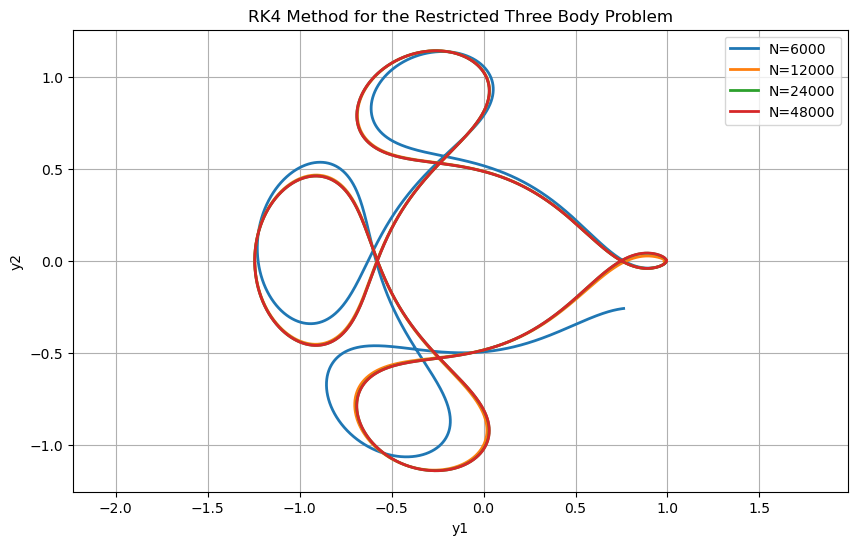

In [10]:
# Next we calculate our solution for different N
solutions = {}
for N in N_list:
    dt = t_end / N
    t, z = rk4(f, t_0, z0, dt, N)
    solutions[N] = (t, z)


plt.figure(figsize=(10, 6))
for N in N_list:
    t, z = solutions[N]
    y1,y2 = z[:,0], z[:,2]
    plt.plot(y1, y2, label=f'N={N}', linewidth=2)
plt.title('RK4 Method for the Restricted Three Body Problem')
plt.xlabel('y1')
plt.ylabel('y2')
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()

/var/folders/zl/tr4yyt811072b_l4prllbb4m0000gn/T/ipykernel_2986/2283366110.py:28: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  moon.set_data(y1[frame], y2[frame])
/var/folders/zl/tr4yyt811072b_l4prllbb4m0000gn/T/ipykernel_2986/2283366110.py:28: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  moon.set_data(y1[frame], y2[frame])


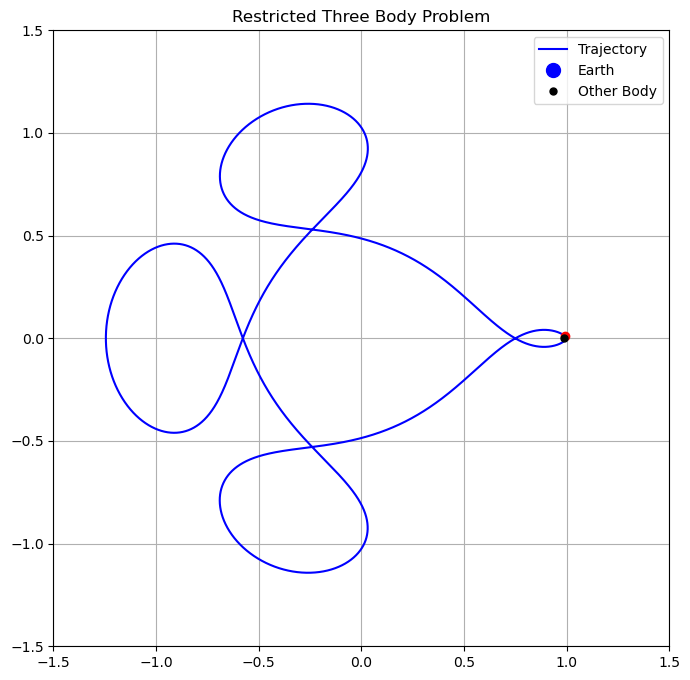

In [11]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

N = 24000

#Solve with RK4
t, z = solutions[N]

y1,y2 = z[:,0], z[:,2]

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.grid()
ax.set_aspect('equal')
ax.set_title('Restricted Three Body Problem')

# Initialize Empty plot
trajectory, = ax.plot([], [], 'b-', label='Trajectory')
moon, = ax.plot([],[], "ro", ms=6) # MOON 
earth = ax.plot([],[], "bo", ms=10,label = "Earth") # EARTH
other = ax.plot(1-mu,0, "ko", ms=5, label= "Other Body")
ax.legend()

def update(frame):
    # Update moon position
    moon.set_data(y1[frame], y2[frame])

    # Update trajectory
    trajectory.set_data(y1[:frame], y2[:frame])

    return trajectory, moon

# Create animation
ani = FuncAnimation(fig, update, frames=range(0,N,10), interval=20, blit=True)

ani.save('restricted_three_body_problem.gif', writer='pillow', fps=30)

